In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.image as mpimg
from torch.utils.data import Dataset, DataLoader
import imageio
import torch
import matplotlib.pyplot as plt
from PIL import Image 
import glob

In [3]:
dog_path = "gdrive/Shared drives/ECE765 Group Project/Dataset/val/dog/"
nondog_path = "gdrive/Shared drives/ECE765 Group Project/Dataset/val/wild/"
train_path = "gdrive/Shared drives/ECE765 Group Project/Dataset/Train_vae/"
val_path = "gdrive/Shared drives/ECE765 Group Project/Dataset/Val_vae/"

In [8]:
'''
#resize training data
all_files = glob.glob(dog_path + "*.jpg")

i = 0

for filename in all_files:
  i+=1
  img = Image.open(filename)
  new_image = img.resize((128, 128))
  new_image.save(train_path+str(i)+".png")

print(i)

all_files = glob.glob(nondog_path + "*.jpg")

for filename in all_files:
  i+=1
  img = Image.open(filename)
  new_image = img.resize((128, 128))
  new_image.save(train_path+str(i)+".png")

print(i)

#Train Dog: 4739
#Train nonDog: 4738
#Train Total: 9477
'''

4739
9477


In [5]:
'''
#resize testing data
all_files = glob.glob(dog_path + "*.jpg")

i = 0

for filename in all_files:
  i+=1
  img = Image.open(filename)
  new_image = img.resize((128, 128))
  new_image.save(val_path+str(i)+".png")

print(i)

all_files = glob.glob(nondog_path + "*.jpg")

for filename in all_files:
  i+=1
  img = Image.open(filename)
  new_image = img.resize((128, 128))
  new_image.save(val_path+str(i)+".png")

print(i)

#Test Dog: 500
#Test nonDog: 500
#Test Total: 1000
'''

500
1000


In [ ]:
# Read Training data
def read_training_data():
  training_size = 9477
  train_images = torch.zeros(training_size, 3, 128, 128, dtype=torch.uint8)
  for n in range(1, training_size+1):
    img_arr = imageio.imread(train_path+str(n)+".png")
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    train_images[n-1] = img_t
  train_images = train_images.float()
  train_images /= 255.0
  return train_images

# Read Validation data
def read_val_data():
  val_size = 1000
  val_images = torch.zeros(val_size, 3, 128, 128, dtype=torch.uint8)
  for n in range(1,val_size+1):
    img_arr = imageio.imread(val_path+str(n)+".png")
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    val_images[n-1] = img_t
  val_images = val_images.float()
  val_images /= 255.0
  return val_images

In [ ]:
#Zero-center and normalize the data

def normalized_images(images):
  n_channels = images.shape[1]
  for c in range(n_channels):
    mean = torch.mean(images[:, c])
    std = torch.std(images[:, c])
    images[:, c] = (images[:, c] - mean) / std
  return images

In [ ]:
#Build Training Dataset

class TrainingDataset(Dataset):
    def __init__(self):
      self.preimages = read_training_data()
      self.images = normalized_images(self.preimages)
      self.labels = np.array([0] * 4739 + [1] * 4738)

    def __len__(self):
      return len(self.images)

    def __getitem__(self, idx):
      img = self.images[idx]
      label = self.labels[idx]
      return img, label

def trainDataset():
  train_dataset = TrainingDataset()
  return train_dataset

In [ ]:
#Build Validation Dataset

class ValDataset(Dataset):
    def __init__(self):
      self.preimages = read_val_data()
      self.images = normalized_images(self.preimages)
      self.labels = np.array([0] * 500 + [1] * 500)

    def __len__(self):
      return len(self.images)

    def __getitem__(self, idx):
      img = self.images[idx]
      label = self.labels[idx]
      return img, label

def valDataset():
  val_dataset = ValDataset()
  return val_dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


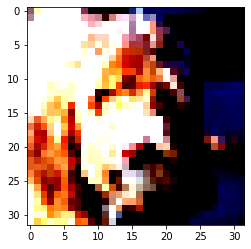

In [ ]:
'''
testImages = read_testing_data()
testImages = normalized_images(testImages)
plt.imshow(testImages[10].permute(1,2,0))
plt.show()
'''

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


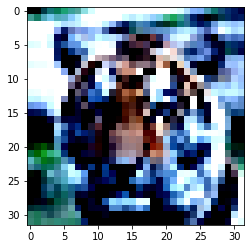

In [ ]:
'''
torch.save(testImages, 'testImages.pt')
testImages_2 = torch.load('testImages.pt')
plt.imshow(testImages_2[999].permute(1,2,0))
plt.show()
'''

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


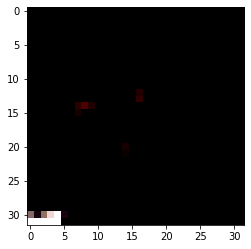

1

In [ ]:
'''
trainImages = trainDataset()
class_names = ['dog', 'nondog']
img, label = trainImages[9401]
plt.imshow(img.permute(1,2,0))
plt.show()
'''

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


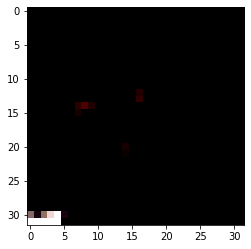

In [ ]:
'''
torch.save(trainImages, 'trainImages.pt')
trainImages_2 = torch.load('trainImages.pt')
class_names = ['dog', 'nondog']
img, label = trainImages_2[9400]
plt.imshow(img.permute(1,2,0))
'''